      Allele  NetMHCIIpan-3.2 AUC  NetMHCIIpan-3.2 PCC  PUFFIN AUC  \
0  DRB1_0101                0.832                0.674       0.827   
1  DRB1_0103                0.678                0.408       0.658   
2  DRB1_0301                0.816                0.621       0.815   
3  DRB1_0401                0.809                0.613       0.805   
4  DRB1_0402                0.701                0.526       0.666   

   PUFFIN PCC  DeepMHCII AUC  DeepMHCII PCC  RPEMHC AUC  RPEMHC PCC  \
0       0.661          0.840          0.687    0.847890    0.701501   
1       0.364          0.638          0.217    0.638158    0.320681   
2       0.612          0.832          0.638    0.838081    0.649981   
3       0.600          0.818          0.629    0.817342    0.631707   
4       0.410          0.673          0.511    0.640867    0.358367   

   T5MHCII AUC  T5MHCII PCC  
0     0.856028     0.729265  
1     0.888889     0.412702  
2     0.837747     0.678621  
3     0.849397     0.683606  
4 

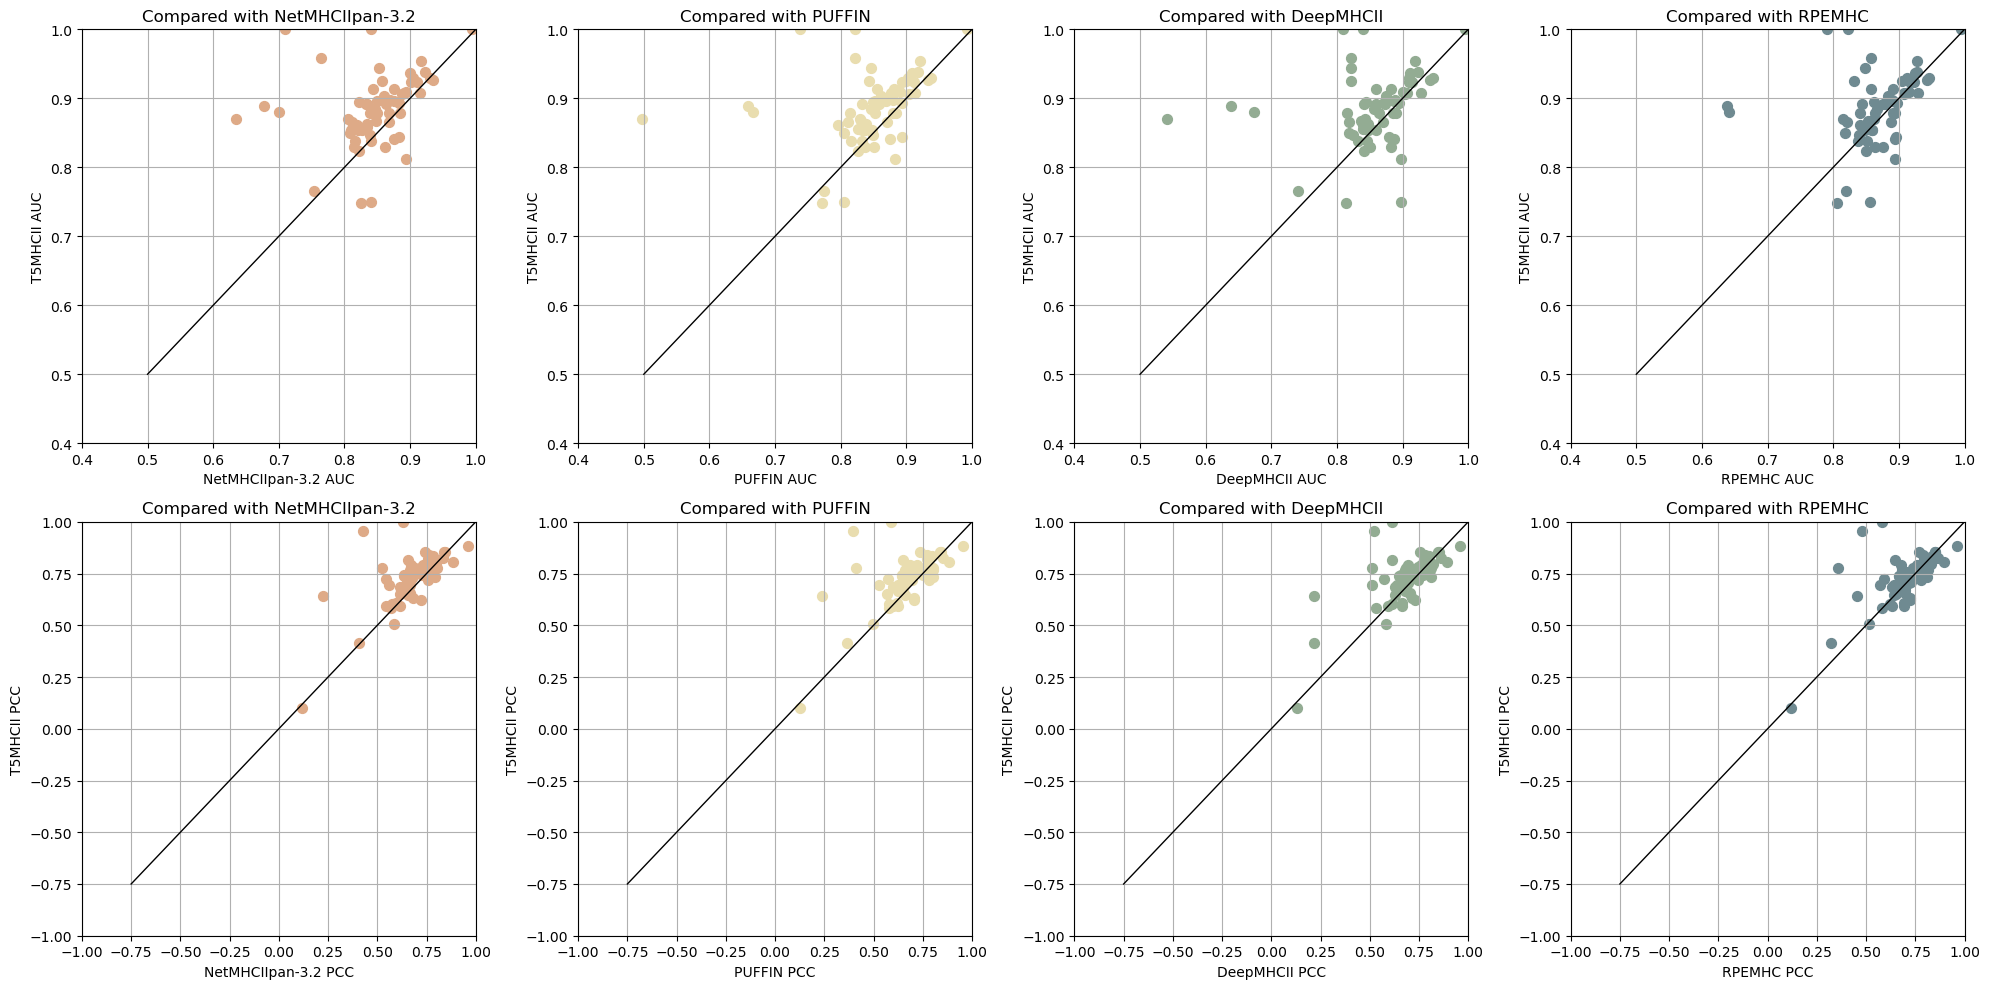

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 加载数据集
file_path = "D:/OneDrive/5CV.xlsx"  # 替换为你的Excel文件路径
df = pd.read_excel(file_path)

# 检查并清理数据，无需删除首行，文件数据已干净
df.columns = ['Allele', 'NetMHCIIpan-3.2 AUC', 'NetMHCIIpan-3.2 PCC', 'PUFFIN AUC', 'PUFFIN PCC', 'DeepMHCII AUC', 'DeepMHCII PCC', 'RPEMHC AUC', 'RPEMHC PCC', 'T5MHCII AUC', 'T5MHCII PCC']

# 确保数值列为正确的数值类型
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 检查数据是否正确加载
print(df.head())

# 定义颜色
new_colors = ['#DEAA87', '#E9DDAF', '#93AC93', '#6F8A91']

# 定义模型和标题用于绘图
models = ['NetMHCIIpan-3.2', 'PUFFIN', 'DeepMHCII', 'RPEMHC']
titles = ['Compared with NetMHCIIpan-3.2', 'Compared with PUFFIN', 'Compared with DeepMHCII', 'Compared with RPEMHC']
sizes = [50, 50, 50, 50]  # 自定义点大小

# 创建绘图，分别展示AUC和PCC的比较
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# AUC对比绘图
for i, model in enumerate(models):
    axs[0, i].scatter(df[f'{model} AUC'], df['T5MHCII AUC'], color=new_colors[i], s=sizes[i])
    axs[0, i].plot([0.5, 1.0], [0.5, 1.0], 'k-', linewidth=1)  # 对角线从(0.4, 0.4)到(1.0, 1.0)
    axs[0, i].set_xlabel(f'{model} AUC')
    axs[0, i].set_ylabel('T5MHCII AUC')
    axs[0, i].set_title(titles[i])
    axs[0, i].set_xlim(0.4, 1.0)  # 设置x轴范围
    axs[0, i].set_ylim(0.4, 1.0)  # 设置y轴范围
    axs[0, i].grid(True)

# PCC对比绘图
for i, model in enumerate(models):
    axs[1, i].scatter(df[f'{model} PCC'], df['T5MHCII PCC'], color=new_colors[i], s=sizes[i])
    axs[1, i].plot([-0.75, 1.0], [-0.75, 1.0], 'k-', linewidth=1)  # 对角线从(0.5, 0.5)到(1.0, 1.0)
    axs[1, i].set_xlabel(f'{model} PCC')
    axs[1, i].set_ylabel('T5MHCII PCC')
    axs[1, i].set_title(titles[i])
    axs[1, i].set_xlim(-1.0, 1.0)  # 设置x轴范围
    axs[1, i].set_ylim(-1.0, 1.0)  # 设置y轴范围
    axs[1, i].grid(True)

# 调整布局并显示图表
plt.tight_layout()
plt.show()


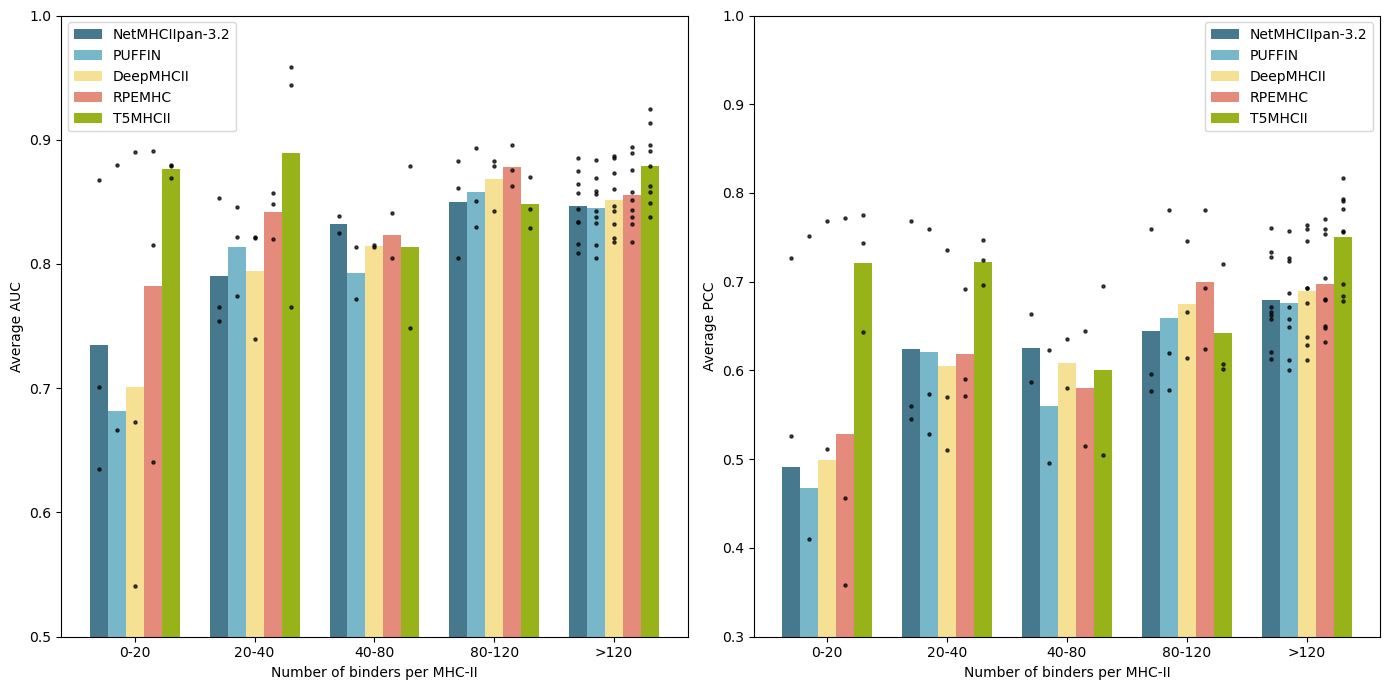

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Reload the dataset to ensure it's in the original state
file_path = "D:/OneDrive/5CV.xlsx"  # 替换为你的Excel文件路径
df = pd.read_excel(file_path)

# Clean up the dataframe by setting appropriate column names and removing the first row
df.columns = df.iloc[0]
df = df.drop(0).reset_index(drop=True)

# Strip any extra spaces from column names
df.columns = df.columns.str.strip()

# Correct the column names for easier access
df.columns = ['Allele', 'NetMHCIIpan-3.2 AUC', 'NetMHCIIpan-3.2 PCC', 'PUFFIN AUC', 'PUFFIN PCC', 'DeepMHCII AUC', 'DeepMHCII PCC', 'RPEMHC AUC', 'RPEMHC PCC', 'T5MHCII AUC', 'T5MHCII PCC']

# Convert numeric columns to proper data types
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Create a dictionary for alleles and their corresponding categories
alleles_categories = {
    '0-20': [
        'H-2-IAk', 'DRB1_0803', 'DRB1_0402', 'DRB1_1502', 'DRB1_0804', 'DRB1_0302', 'DRB1_0305', 'DRB1_0407',
        'DRB1_1304', 'DRB1_0102', 'DRB1_1201', 'DRB1_1403', 'DRB1_0411'
    ],
    '20-40': [
        'H-2-IEd', 'H-2-IEk', 'H-2-IAu'
    ],
    '40-80': [
        'H-2-IAs', 'HLA-DQA10301-DQB10301'
    ],
    '80-120': [
        'HLA-DQA10103-DQB10603', 'HLA-DQA10104-DQB10503', 'HLA-DQA10401-DQB10402', 'HLA-DQA10505-DQB10301'
    ],
    '>120': [
        'DRB1_0101', 'DRB1_0301', 'DRB1_0401', 'DRB1_0701', 'DRB1_1101', 'DRB1_1501', 'DRB1_0801', 'DRB1_1202',
        'DRB1_1302', 'DRB1_1301', 'DRB1_1503', 'DRB1_1504', 'DRB1_0802', 'DRB1_1204', 'DRB1_1401', 'DRB1_1402',
        'DRB1_1417', 'DRB1_1418', 'DRB1_1420', 'DRB1_1421', 'DRB1_1422', 'DRB1_1424', 'DRB1_1425', 'DRB1_1426',
        'DRB1_1428', 'DRB1_1429', 'DRB1_1430', 'DRB1_1431', 'DRB1_1432', 'DRB1_1433', 'DRB1_1434', 'DRB1_1435',
        'DRB1_1436', 'DRB1_1437', 'DRB1_1438', 'DRB1_1439', 'DRB1_1440', 'DRB1_1441', 'DRB1_1442', 'DRB1_1443',
        'DRB1_1444', 'DRB1_1445', 'DRB1_1446', 'DRB1_1447', 'DRB1_1448', 'DRB1_1449', 'DRB1_1450', 'DRB1_1451'
    ]
}

# Map alleles to their categories in the DataFrame
df['Binders Category'] = df['Allele'].map(
    lambda allele: next((category for category, alleles in alleles_categories.items() if allele in alleles), 'Unknown')
)

# Remove rows with 'Unknown' category as they don't belong to any specified category
df = df[df['Binders Category'] != 'Unknown']

# Define the models and new colors based on the provided image
models = ['NetMHCIIpan-3.2', 'PUFFIN', 'DeepMHCII', 'RPEMHC', 'T5MHCII']
new_colors = ['#46788E', '#78B7C9', '#F6E093', '#E58B7B', '#97B319']

# Define the function to plot the bars and scatter points with new colors
def plot_bars_with_scatter(ax, metric):
    bar_width = 0.15
    for i, model in enumerate(models):
        mean_values = df.groupby('Binders Category')[f'{model} {metric}'].mean()
        indices = np.arange(len(mean_values))
        ax.bar(indices + i * bar_width, mean_values, bar_width, label=model, color=new_colors[i])

        # Add scatter points for each model with smaller size
        for j, cat in enumerate(mean_values.index):
            cat_data = df[df['Binders Category'] == cat]
            scatter_x = np.full(cat_data.shape[0], indices[j] + i * bar_width)
            scatter_y = cat_data[f'{model} {metric}']
            ax.scatter(scatter_x, scatter_y, color='black', s=5, alpha=0.7)

    ax.set_xticks(indices + bar_width * 2)
    ax.set_xticklabels(mean_values.index)
    ax.set_ylim(0.5, 1.0) if metric == 'AUC' else ax.set_ylim(0.3, 1.0)

# Create subplots for AUC and PCC comparisons with specific models
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Plot AUC comparisons with scatter points
plot_bars_with_scatter(axs[0], 'AUC')
axs[0].set_xlabel('Number of binders per MHC-II')
axs[0].set_ylabel('Average AUC')


# Plot PCC comparisons with scatter points
plot_bars_with_scatter(axs[1], 'PCC')
axs[1].set_xlabel('Number of binders per MHC-II')
axs[1].set_ylabel('Average PCC')


# Add legends
axs[0].legend()
axs[1].legend()

# Adjust layout and show plots
plt.tight_layout()
plt.show()

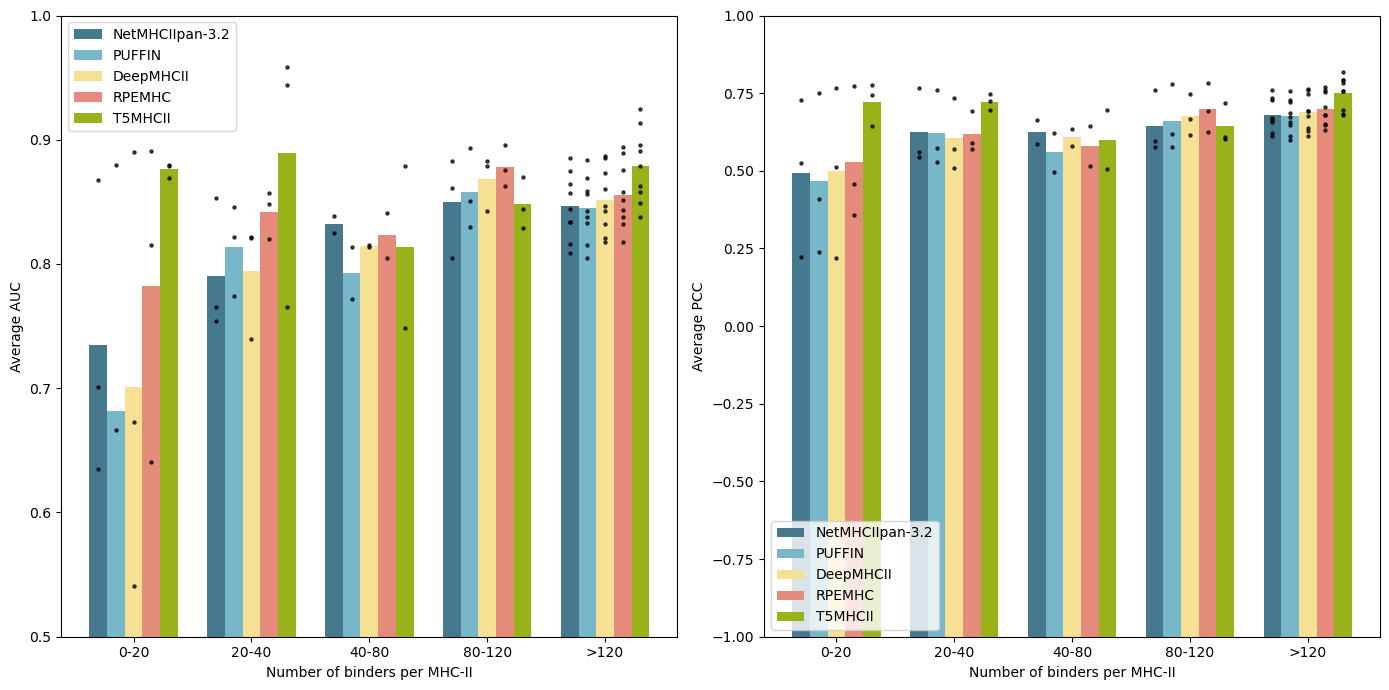

In [12]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Reload the dataset to ensure it's in the original state
file_path = "D:/OneDrive/5CV.xlsx"  # 替换为你的Excel文件路径
df = pd.read_excel(file_path)

# Clean up the dataframe by setting appropriate column names and removing the first row
df.columns = df.iloc[0]
df = df.drop(0).reset_index(drop=True)

# Strip any extra spaces from column names
df.columns = df.columns.str.strip()

# Correct the column names for easier access
df.columns = ['Allele', 'NetMHCIIpan-3.2 AUC', 'NetMHCIIpan-3.2 PCC', 'PUFFIN AUC', 'PUFFIN PCC', 'DeepMHCII AUC', 'DeepMHCII PCC', 'RPEMHC AUC', 'RPEMHC PCC', 'T5MHCII AUC', 'T5MHCII PCC']

# Convert numeric columns to proper data types
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Create a dictionary for alleles and their corresponding categories
alleles_categories = {
    '0-20': [
        'H-2-IAk', 'DRB1_0803', 'DRB1_0402', 'DRB1_1502', 'DRB1_0804', 'DRB1_0302', 'DRB1_0305', 'DRB1_0407',
        'DRB1_1304', 'DRB1_0102', 'DRB1_1201', 'DRB1_1403', 'DRB1_0411'
    ],
    '20-40': [
        'H-2-IEd', 'H-2-IEk', 'H-2-IAu'
    ],
    '40-80': [
        'H-2-IAs', 'HLA-DQA10301-DQB10301'
    ],
    '80-120': [
        'HLA-DQA10103-DQB10603', 'HLA-DQA10104-DQB10503', 'HLA-DQA10401-DQB10402', 'HLA-DQA10505-DQB10301'
    ],
    '>120': [
        'DRB1_0101', 'DRB1_0301', 'DRB1_0401', 'DRB1_0701', 'DRB1_1101', 'DRB1_1501', 'DRB1_0801', 'DRB1_1202',
        'DRB1_1302', 'DRB1_1301', 'DRB1_1503', 'DRB1_1504', 'DRB1_0802', 'DRB1_1204', 'DRB1_1401', 'DRB1_1402',
        'DRB1_1417', 'DRB1_1418', 'DRB1_1420', 'DRB1_1421', 'DRB1_1422', 'DRB1_1424', 'DRB1_1425', 'DRB1_1426',
        'DRB1_1428', 'DRB1_1429', 'DRB1_1430', 'DRB1_1431', 'DRB1_1432', 'DRB1_1433', 'DRB1_1434', 'DRB1_1435',
        'DRB1_1436', 'DRB1_1437', 'DRB1_1438', 'DRB1_1439', 'DRB1_1440', 'DRB1_1441', 'DRB1_1442', 'DRB1_1443',
        'DRB1_1444', 'DRB1_1445', 'DRB1_1446', 'DRB1_1447', 'DRB1_1448', 'DRB1_1449', 'DRB1_1450', 'DRB1_1451'
    ]
}

# Map alleles to their categories in the DataFrame
df['Binders Category'] = df['Allele'].map(
    lambda allele: next((category for category, alleles in alleles_categories.items() if allele in alleles), 'Unknown')
)

# Remove rows with 'Unknown' category as they don't belong to any specified category
df = df[df['Binders Category'] != 'Unknown']

# Define the models and new colors based on the provided image
models = ['NetMHCIIpan-3.2', 'PUFFIN', 'DeepMHCII', 'RPEMHC', 'T5MHCII']
new_colors = ['#46788E', '#78B7C9', '#F6E093', '#E58B7B', '#97B319']

def plot_bars_with_scatter(ax, metric):
    bar_width = 0.15
    for i, model in enumerate(models):
        mean_values = df.groupby('Binders Category')[f'{model} {metric}'].mean()
        indices = np.arange(len(mean_values))

        # 根据不同的 metric 设置柱状图的底部和高度
        if metric == 'AUC':
            bottom = 0.5  # AUC 的柱底从 0.5 开始
            height = mean_values - 0.5  # 柱的高度相对于 0.5
        elif metric == 'PCC':
            bottom = -1  # PCC 的柱底从 -1 开始
            height = mean_values - (-1)  # 柱的高度相对于 -1

        # 绘制柱状图
        ax.bar(
            indices + i * bar_width,
            height,  # 设置柱的高度
            bar_width,
            label=model,
            color=new_colors[i],
            bottom=bottom  # 设置柱的底部
        )

        # 添加散点
        for j, cat in enumerate(mean_values.index):
            cat_data = df[df['Binders Category'] == cat]
            scatter_x = np.full(cat_data.shape[0], indices[j] + i * bar_width)
            scatter_y = cat_data[f'{model} {metric}']
            ax.scatter(scatter_x, scatter_y, color='black', s=5, alpha=0.7)

    ax.set_xticks(indices + bar_width * 2)
    ax.set_xticklabels(mean_values.index)

    # 设置 y 轴范围
    if metric == 'AUC':
        ax.set_ylim(0.5, 1.0)  # AUC 的范围
    elif metric == 'PCC':
        ax.set_ylim(-1.0, 1.0)  # PCC 的范围


# 创建子图
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# 绘制 AUC 的柱状图
plot_bars_with_scatter(axs[0], 'AUC')
axs[0].set_xlabel('Number of binders per MHC-II')
axs[0].set_ylabel('Average AUC')

# 绘制 PCC 的柱状图
plot_bars_with_scatter(axs[1], 'PCC')
axs[1].set_xlabel('Number of binders per MHC-II')
axs[1].set_ylabel('Average PCC')

# 添加图例和调整布局
axs[0].legend()
axs[1].legend()
plt.tight_layout()
plt.show()



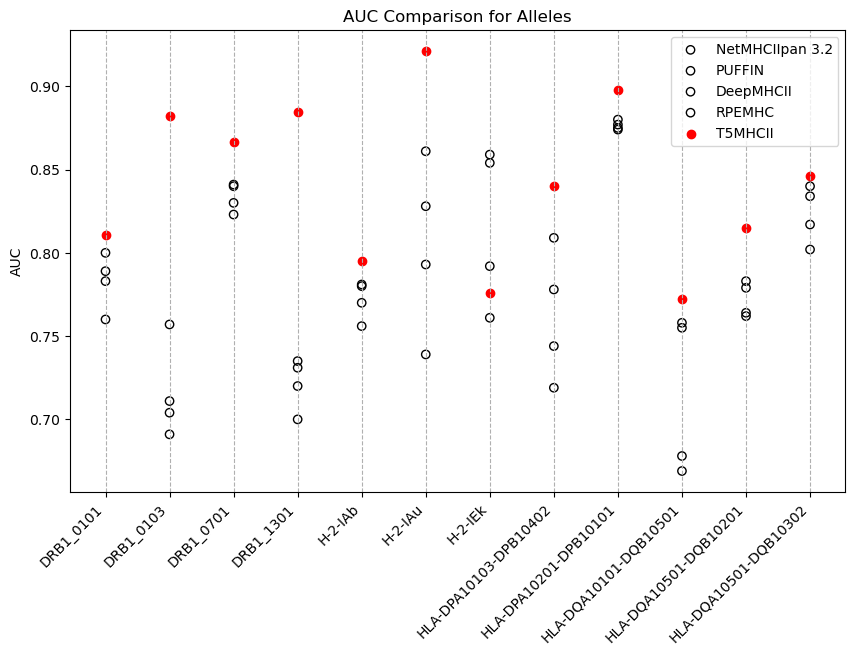

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from an Excel file
file_path = 'D:/OneDrive/LOMO.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Filter data for specific alleles
specific_alleles = [
        'DRB1_0101',
        'DRB1_0103',
        'DRB1_0701',
        'DRB1_1301',
        'H-2-IAb',
        'H-2-IAu',
        'H-2-IEk',
        'HLA-DPA10103-DPB10402',
        'HLA-DPA10201-DPB10101',
        'HLA-DQA10101-DQB10501',
        'HLA-DQA10501-DQB10201',
        'HLA-DQA10501-DQB10302'
        ]

filtered_data = data[data['Allele'].isin(specific_alleles)]

# Extracting AUC data for each model
alleles = filtered_data['Allele']
netmhc_auc = filtered_data['NetMHCIIpan-3.2 AUC']
puffin_auc = filtered_data['PUFFIN AUC']
deepmhc_auc = filtered_data['DeepMHCII AUC']
rpemhc_auc = filtered_data['RPEMHC AUC']
t5mhciipan_auc = filtered_data['T5MHCII AUC']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(alleles, netmhc_auc, facecolors='none', edgecolors='black', label='NetMHCIIpan 3.2')
plt.scatter(alleles, puffin_auc, facecolors='none', edgecolors='black', label='PUFFIN')
plt.scatter(alleles, deepmhc_auc, facecolors='none', edgecolors='black', label='DeepMHCII')
plt.scatter(alleles, rpemhc_auc, facecolors='none', edgecolors='black', label='RPEMHC')
plt.scatter(alleles, t5mhciipan_auc, color='red', label='T5MHCII')

plt.ylabel('AUC')
plt.title('AUC Comparison for Alleles')
plt.legend()

# Adjust x-axis labels to be at a 45-degree angle
plt.xticks(rotation=45, ha='right')  # 'ha' stands for horizontal alignment

# Adjust grid lines: remove horizontal lines and make vertical lines dashed
plt.grid(axis='x', linestyle='--')

plt.show()
